#####################################################################################
#
#   Pennylane Basic Tutorial Qubit Rotations
#   @Text Tjark Ziehm
#   @Version 0.01 Dez 2021
#   @Creater Xanadu/Pennylane-Team
#   @Documentation
#   -Optimizer @ Pennylane: 
#         https://pennylane.readthedocs.io/en/stable/introduction/optimizers.html
#   -@BQP-Docs:   
#      https://docs.google.com/document/d/1YYOCEOMKd2cmsvEPfVoHobVOthlL9vW2XdDjT-pToCs/edit?usp=sharing     
#   -@BQP-Book
#  https://quantum-research.gitbook.io/introduction-to-quantum-computing/quantum-machine-learning/optimizer
#
#   @Science 
#
#   @Guide
#
#   @Goal
#
#   @DataSet:
#             
#
#
#####################################################################################

In this tutorial we will go to make 2 Rotations at one Qubit and one messurment.
This is represented in the picture after the import section.

In [6]:
#%matplotlib inline
import pennylane as qml  #Quantum Machine Learning
from pennylane import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

from qutip import *
from qutip.ipynbtools import plot_animation



![Drag Racing](https://pennylane.ai/qml/_images/rotation_circuit.png)

In [36]:
number = 1000  #try -> None, 10, 1000, 100000 to understand the stochastic results
device1 = qml.device("default.qubit", wires=1, shots=number)

This Circuit rotates the qubit at the X-Axe and  then at the Y-Axe:
![](https://github.com/ohioh/IntroductionQuantumComputing/blob/main/QuantumMachineLearning/PennyLaneTutorials/BasicTutorialQubitRotation/data/RotationX.png?raw=true)

followed by ...
![](https://github.com/ohioh/IntroductionQuantumComputing/blob/main/QuantumMachineLearning/PennyLaneTutorials/BasicTutorialQubitRotation/data/RotationY.png?raw=true)


The State will be in a Superposition-State:
![](https://github.com/ohioh/IntroductionQuantumComputing/blob/main/QuantumMachineLearning/PennyLaneTutorials/BasicTutorialQubitRotation/data/Superposition.png?raw=true)

Glimpse: A Circuit represents the Superosition-Calculation for a task
In our Case we make a Validation with the Pauli Z Gate at the end

In [37]:
@qml.qnode(device1)               #Quantum-Node "Frame4circuit@device"

def circuit(params):
    qml.RX(params[0], wires=0) #Gate link below
    qml.RY(params[1], wires=0) #Gate link below
    return qml.expval(qml.PauliZ(0)) #Observable @wire0 !!! Pauli matrices are Hermition ( Observable ) and unitary ( Gate )

phiX = 0.54  #rotation angle ϕ or Theta(IBM)
phiY = 0.12  #rotation angle ϕ or Theta(IBM)
params = np.array([phiX, phiY])


print("Expectation value:", circuit(params))

print(qml.draw(circuit)(params))

Expectation value: 0.828
 0: ──RX(0.54)──RY(0.12)──┤ ⟨Z⟩ 



In [19]:
device2 = qml.device("default.qubit", wires=1)

@qml.qnode(device2)

def circuit3(params):
    #qml.Hadamard(wires=0)
    qml.RX(params[0], wires=0) #Gate link below
    qml.RY(params[1], wires=0) #Gate link below
    return qml.state()

circuit3(params)

tensor([0.96203663+0.01599429j, 0.05779156-0.26625146j], requires_grad=True)

### The PauliZ Observabel:
![](data/pauliz.png)

### Links to Documentation:

https://pennylane.readthedocs.io/en/stable/code/api/pennylane.RX.html?highlight=rx#pennylane.RX

https://pennylane.readthedocs.io/en/stable/code/api/pennylane.RY.html?highlight=ry#pennylane.RY

### Remember the Bloch-Sphere:

![](https://i.stack.imgur.com/DjkNh.png)

Exkurs: Visualisation with Qutip

@Documentation: https://qutip.org/docs/4.1/guide/guide.html

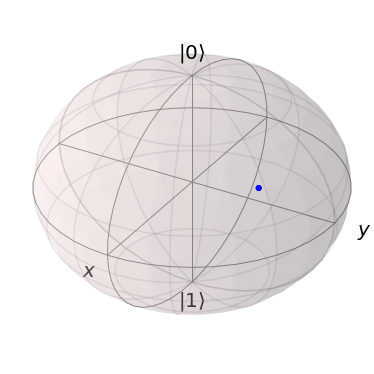

In [38]:
data = [1,1,1]
b = Bloch()
b.add_points(data)

b.show()


## Calculating quantum gradients

In [40]:
dcircuit = qml.grad(circuit, argnum=0)

In [41]:
print("PhiX:",phiX,"PhiY:",phiY,dcircuit([phiX, phiY]))

PhiX: 0.54 PhiY: 0.12 [array(-0.549), array(-0.132)]


In [42]:
@qml.qnode(device1)

def circuit2(phi1, phi2):
    qml.RX(phi1, wires=0)
    qml.RY(phi2, wires=0)
    return qml.expval(qml.PauliZ(0))

In [43]:
dcircuit2 = qml.grad(circuit2, argnum=[0, 1])
print(dcircuit2(phiX, phiY))

(array(-0.453), array(-0.12))


## Optimization

We need to define a cost function . By minimizing the cost function, the optimizer determines the values 
of the circuit parameters that produce the desired result.

From PauliZ[-1,1] = 1 -> -1 

In [44]:
def cost(x):
    #return circuit2(x)
    return circuit(x)

In [45]:
alternativePhiXStart = 0.011
alternativePhiYStart = 0.012
init_params = np.array([alternativePhiXStart , alternativePhiYStart], requires_grad=True)

print(cost(init_params))

1.0


In [49]:
# initialise the optimizer
optimizer1 = qml.GradientDescentOptimizer(stepsize=0.4)

optimizer2 = qml.AdagradOptimizer(stepsize=0.4)

# set the number of steps
steps = 100

# set the initial parameter values
params = init_params  

for i in range(steps):
    # update the circuit parameters
    params = optimizer1.step(cost, params)

    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))

optimizer2.reset()


print("Optimized rotation angles: {}".format(params))

Cost after step     5:  0.9980000
Cost after step    10:  0.8940000
Cost after step    15:  0.1360000
Cost after step    20: -0.0440000
Cost after step    25: -0.5680000
Cost after step    30: -0.9980000
Cost after step    35: -1.0000000
Cost after step    40: -1.0000000
Cost after step    45: -1.0000000
Cost after step    50: -1.0000000
Cost after step    55: -1.0000000
Cost after step    60: -1.0000000
Cost after step    65: -1.0000000
Cost after step    70: -1.0000000
Cost after step    75: -1.0000000
Cost after step    80: -1.0000000
Cost after step    85: -1.0000000
Cost after step    90: -1.0000000
Cost after step    95: -1.0000000
Cost after step   100: -1.0000000
Optimized rotation angles: [0.0082 3.1376]


In [ ]:
# initialise the optimizer
optimizerOWN = qml.

# set the number of steps
steps = 100

# set the initial parameter values
params = init_params  

for i in range(steps):
    # update the circuit parameters
    params = optimizerOWN.step(cost, params)

    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))




print("Optimized rotation angles: {}".format(params))

In [50]:
def layer(W):

    qml.Rot(W[0, 0], W[0, 1], W[0, 2], wires=0) #ROT => 
    qml.Rot(W[1, 0], W[1, 1], W[1, 2], wires=1)
    qml.Rot(W[2, 0], W[2, 1], W[2, 2], wires=2)
    qml.Rot(W[3, 0], W[3, 1], W[3, 2], wires=3)

    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 0])